#### MODELO DE CLASIFICACIÓN

A partir de la exploración, se entrena un modelo de clasificación para predecir si un título puede considerarse "bien valorado" según su puntuación en IMDb. El análisis combina herramientas de Python como pandas, matplotlib, seaborn y scikit-learn, y permite obtener insights útiles para perfiles interesados en curaduría de contenido, marketing o desarrollo de productos audiovisuales.

Aunque imdb_score es originalmente una variable continua, se convertirá en clases (clasificación ordinal o categórica) para predecir, por ejemplo, si una película es:

Baja calidad (<6.0)

Media calidad (6.0–7.9)

Alta calidad (≥8.0)

En este proyecto se desarrollará un modelo de clasificación para predecir categorías de puntaje IMDb. Con el objetivo de comparar el desempeño, se implementarán y evaluarán dos algoritmos distintos: Árbol de Decisión y Random Forest. Ambos serán entrenados utilizando datos preprocesados y sus resultados se analizarán a través de métricas de desempeño como precisión, recall y f1-score.

#### LIBRERÍAS

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [90]:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [92]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#### PREPARAR DATOS

In [93]:
df = pd.read_csv('https://raw.githubusercontent.com/GabiMiranda05/Proyecto-Ingenias/refs/heads/main/Tercera-Entrega/datos_procesados.csv')

In [94]:
df.head()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,type_enc,age_certification_ord,action,...,TZ,UA,US,UY,VA,VE,VN,XX,ZA,ZW
0,1976,113,0.0,8.3,795222.0,27.612,8.2,0,8,0,...,0,0,1,0,0,0,0,0,0,0
1,1975,91,0.0,8.2,530877.0,18.216,7.8,0,5,0,...,0,0,0,0,0,0,0,0,0,0
2,1979,94,0.0,8.0,392419.0,17.505,7.8,0,8,0,...,0,0,0,0,0,0,0,0,0,0
3,1973,133,0.0,8.1,391942.0,95.337,7.7,0,8,0,...,0,0,1,0,0,0,0,0,0,0
4,1969,30,4.0,8.8,72895.0,12.919,8.3,1,7,0,...,0,0,0,0,0,0,0,0,0,0


La variable objetivo será imdb_score y transformarán los valores en 3 categorías: alta, media y baja.

In [95]:
# Crear una nueva columna categórica a partir de imdb_score
def clasificar_imdb(score):
    if score < 5.0:
        return 'baja'
    elif score < 7.0:
        return 'media'
    else:
        return 'alta'

df['imdb_score_cat'] = df['imdb_score'].apply(clasificar_imdb)

Se codifica la variable en categorías 0, 1 y 2 de acuerdo a su nivel de puntaje

In [96]:
le = LabelEncoder()
df['imdb_score_cat_enc'] = le.fit_transform(df['imdb_score_cat'])

In [97]:
df = df.drop(columns=['imdb_score', 'imdb_score_cat'])

In [98]:
df.head()

,release_year,runtime,seasons,imdb_votes,tmdb_popularity,tmdb_score,type_enc,age_certification_ord,action,animation,...,UA,US,UY,VA,VE,VN,XX,ZA,ZW,imdb_score_cat_enc
0,1976,113,0.0,795222.0,27.612,8.2,0,8,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1975,91,0.0,530877.0,18.216,7.8,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1979,94,0.0,392419.0,17.505,7.8,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1973,133,0.0,391942.0,95.337,7.7,0,8,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1969,30,4.0,72895.0,12.919,8.3,1,7,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
# Variable objetivo
y = df['imdb_score_cat_enc']

# Variables predictoras (todas las demás menos la objetivo)
X = df.drop(columns=['imdb_score_cat_enc'])

# Separar en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Árbol de decisión

In [83]:
# Definí el espacio de búsqueda
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Modelo base
dt = DecisionTreeClassifier(random_state=42)

# GridSearch
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid,
                           cv=3, n_jobs=-1, scoring='accuracy', verbose=1)

In [84]:
# Entrenamiento
grid_search.fit(X_train, y_train)

# Ver mejores parámetros
print("Mejores parámetros:", grid_search.best_params_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Mejores parámetros: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [86]:
# Obtener el mejor modelo
best_dt = grid_search.best_estimator_

**Evaluar el modelo**

In [87]:
# Predecir en el conjunto de test
y_pred = best_dt.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Reporte de clasificación
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))

Accuracy: 0.7190160832544938
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.75      0.70      0.73       404
           1       0.64      0.27      0.38       100
           2       0.70      0.81      0.75       553

    accuracy                           0.72      1057
   macro avg       0.70      0.59      0.62      1057
weighted avg       0.72      0.72      0.71      1057



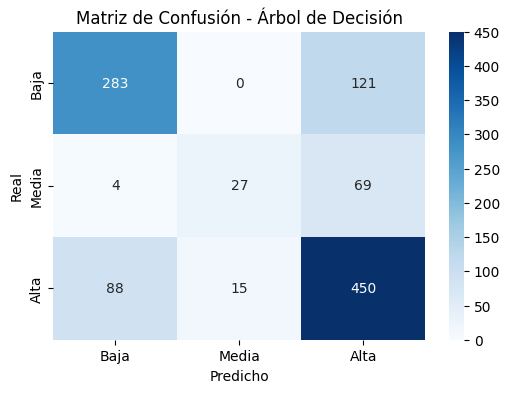

In [88]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Baja', 'Media', 'Alta'], yticklabels=['Baja', 'Media', 'Alta'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.show()

El modelo de árbol de decisión alcanza una precisión general del 72%, con buen rendimiento en las clases baja y alta. Sin embargo, presenta dificultades para identificar correctamente la clase media, reflejado en un recall bajo (27%) para esa categoría. Esto sugiere un posible desequilibrio en los datos o una mayor similitud de la clase media con las otras clases, lo cual podría mejorarse con técnicas de balanceo o modelos más robustos.

### Random Forest

In [60]:
# Crear el modelo
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

In [65]:
param_grid = {
    'n_estimators': [50, 100, 200],          # cantidad de árboles
    'max_depth': [None, 5, 10, 20],          # profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],         # mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],           # mínimo de muestras en una hoja
    'max_features': ['auto', 'sqrt', 'log2'] # cantidad de features consideradas en cada split
}

In [66]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

In [67]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
324 fits failed out of a total of 972.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
324 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/util

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=2)

In [68]:
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor accuracy:", grid_search.best_score_)

Mejores parámetros: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mejor accuracy: 0.7444388213218058


**Evaluar el Modelo**

In [69]:
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

In [70]:
print("Accuracy en test:", accuracy_score(y_test, y_pred))
print("Reporte:\n", classification_report(y_test, y_pred))

Accuracy en test: 0.7568590350047304
Reporte:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78       404
           1       0.69      0.29      0.41       100
           2       0.75      0.82      0.78       553

    accuracy                           0.76      1057
   macro avg       0.74      0.63      0.66      1057
weighted avg       0.75      0.76      0.75      1057



- El Random Forest mejora la precisión general y la capacidad para predecir las clases mayoritarias.

- Todavía hay margen para mejorar la detección de la clase media, quizás con técnicas de balanceo o características nuevas.

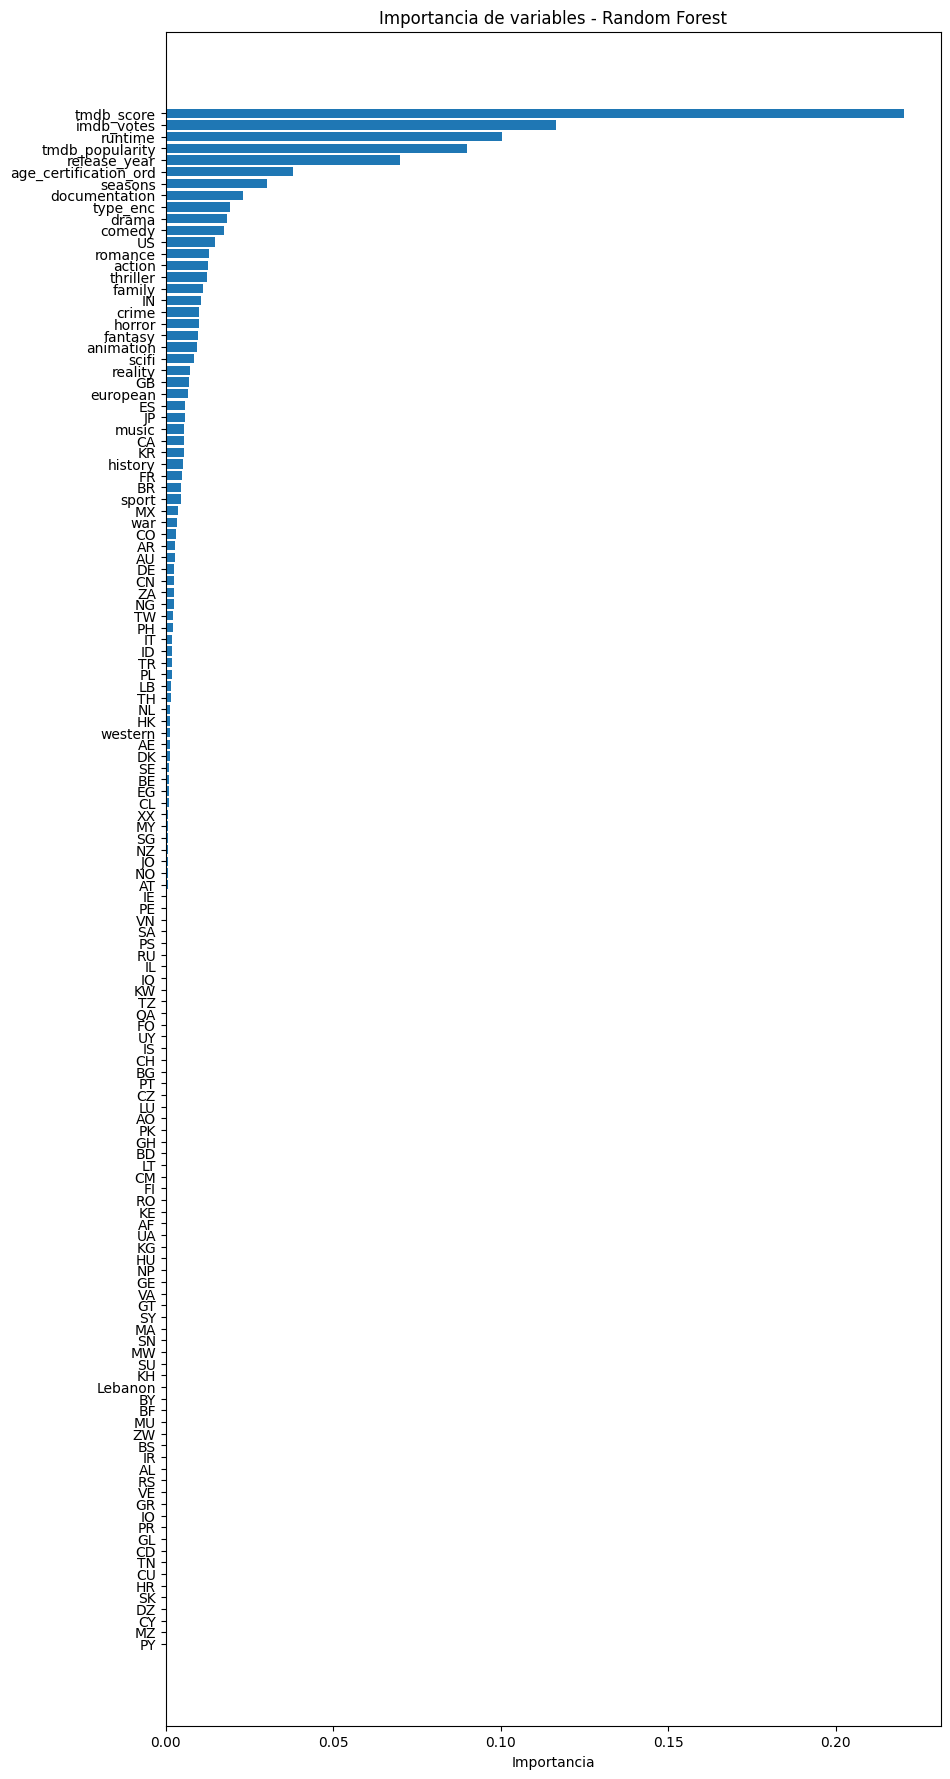

In [78]:
# Obtener importancia de variables
importances = best_rf.feature_importances_

# Obtener nombres de columnas (features)
features = X_train.columns

# Crear dataframe para ordenar
feat_imp = pd.DataFrame({'feature': features, 'importance': importances})
feat_imp = feat_imp.sort_values(by='importance', ascending=False)

# Graficar
plt.figure(figsize=(10,22))
plt.barh(feat_imp['feature'], feat_imp['importance'])
plt.gca().invert_yaxis()  # Invertir eje para mostrar la más importante arriba
plt.xlabel('Importancia')
plt.title('Importancia de variables - Random Forest')
plt.show()